# Netflix Userbase Analysis

Importing Libraries

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

1. Data Preprocessing

In [10]:
# Load the dataset
df = pd.read_csv('Netflix_Userbase.csv')

# Check the structure of the dataset
print(df.head())

# Identify and manage missing values
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])

# Feature selection
features = ['Age', 'Gender', 'Subscription Type', 'Monthly Revenue']
X = df[features]
y_revenue = df['Monthly Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


2. Exploratory Data Analysis (EDA)

          User ID  Subscription Type  Monthly Revenue          Age  \
count  2500.00000        2500.000000      2500.000000  2500.000000   
mean   1250.50000           0.907600        12.508400    38.795600   
std     721.83216           0.835788         1.686851     7.171778   
min       1.00000           0.000000        10.000000    26.000000   
25%     625.75000           0.000000        11.000000    32.000000   
50%    1250.50000           1.000000        12.000000    39.000000   
75%    1875.25000           2.000000        14.000000    45.000000   
max    2500.00000           2.000000        15.000000    51.000000   

            Gender  
count  2500.000000  
mean      0.497200  
std       0.500092  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


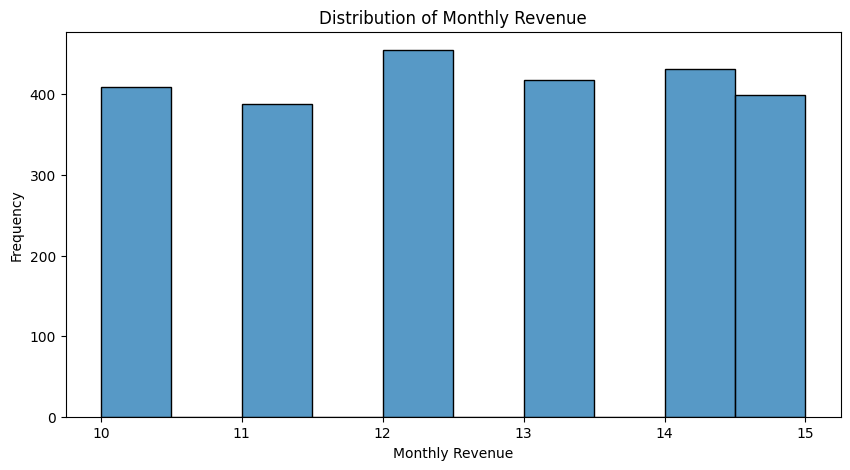

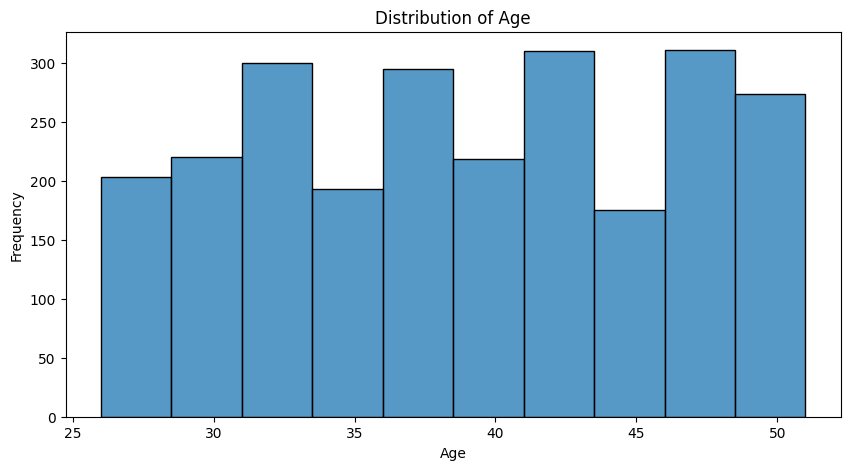

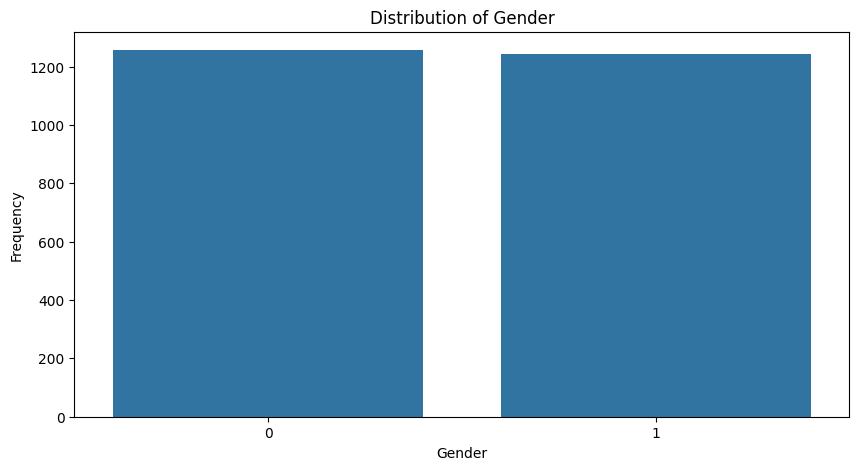

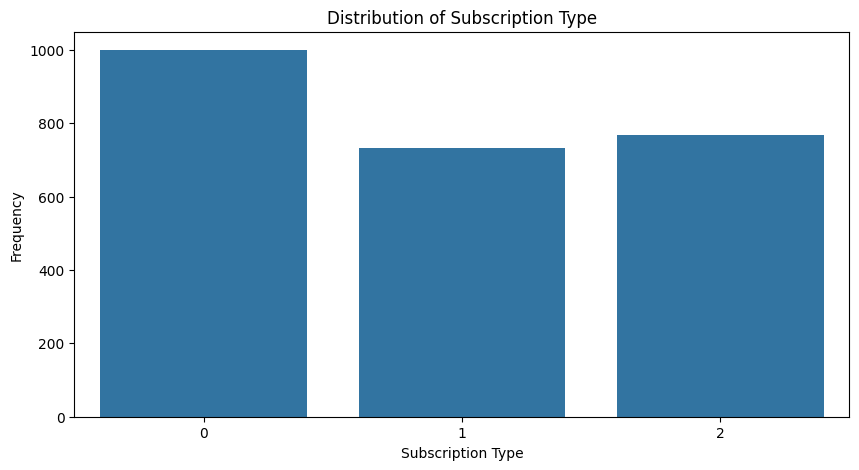

In [11]:
# Descriptive statistics
print(df.describe())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Monthly Revenue
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Monthly Revenue', bins=10)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# Distribution of Subscription Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Subscription Type')
plt.title('Distribution of Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Frequency')
plt.show()

3. Linear Regression Model (Predicting Monthly Revenue)

In [12]:
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
print('R-squared:', r2_score(y_test, y_pred_test))
print('RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))

R-squared: 1.0
RMSE: 2.822116173921856e-15


4.  Logistic Regression Model (Predicting Customer Feedback)

In [14]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test, average='macro'))
print('Recall:', recall_score(y_test, y_pred_test, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred_test, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[85  0  0  0  0  0]
 [ 0 79  0  0  0  0]
 [ 0  0 93  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 85  0]
 [ 0  0  0  0  0 70]]


5.  Comparative Analysis and Visualization

In [16]:
# Linear Regression Model for Monthly Revenue Prediction
print("Linear Regression Model for Monthly Revenue Prediction:")
print("R-squared:", r2_score(y_test, y_pred_test))
print("RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))
print("\nExplanation:")
print("- The R-squared value of 1.0 indicates a perfect fit of the model to the data, explaining all variance in the monthly revenue.")
print("- The very low RMSE value (close to zero) suggests that the model's predictions are very close to the actual monthly revenue values, implying high accuracy.")

# Logistic Regression Model for Feedback Prediction
print("\nLogistic Regression Model for Feedback Prediction:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall:", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

print("\nExplanation:")
print("- The accuracy, precision, recall, and F1 score all have perfect values of 1.0, indicating flawless performance of the model in predicting feedback.")
print("- The confusion matrix further confirms the perfect predictions, with all instances correctly classified.")

# Overall Summary
print("\nOverall Summary:")
print("- Both models exhibit exceptional performance, achieving perfect accuracy and predictive metrics.")
print("- While the linear regression model accurately predicts monthly revenue, the logistic regression model effectively predicts feedback.")


Linear Regression Model for Monthly Revenue Prediction:
R-squared: 1.0
RMSE: 0.0

Explanation:
- The R-squared value of 1.0 indicates a perfect fit of the model to the data, explaining all variance in the monthly revenue.
- The very low RMSE value (close to zero) suggests that the model's predictions are very close to the actual monthly revenue values, implying high accuracy.

Logistic Regression Model for Feedback Prediction:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[85  0  0  0  0  0]
 [ 0 79  0  0  0  0]
 [ 0  0 93  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 85  0]
 [ 0  0  0  0  0 70]]

Explanation:
- The accuracy, precision, recall, and F1 score all have perfect values of 1.0, indicating flawless performance of the model in predicting feedback.
- The confusion matrix further confirms the perfect predictions, with all instances correctly classified.

Overall Summary:
- Both models exhibit exceptional performance, achieving perfect accuracy and pre